# Rain prediction model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

# Let's load our dataset into pandas DataFrame.

In [6]:
raw_df = pd.read_csv('../input/weatheraus/weatherAUS.csv')


In [7]:
raw_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


In [8]:
raw_df.shape

(142193, 24)

In [9]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [10]:
raw_df.dropna(subset=['RainTomorrow'],inplace=True)

In [11]:
raw_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


# Exploratory Data Analysis

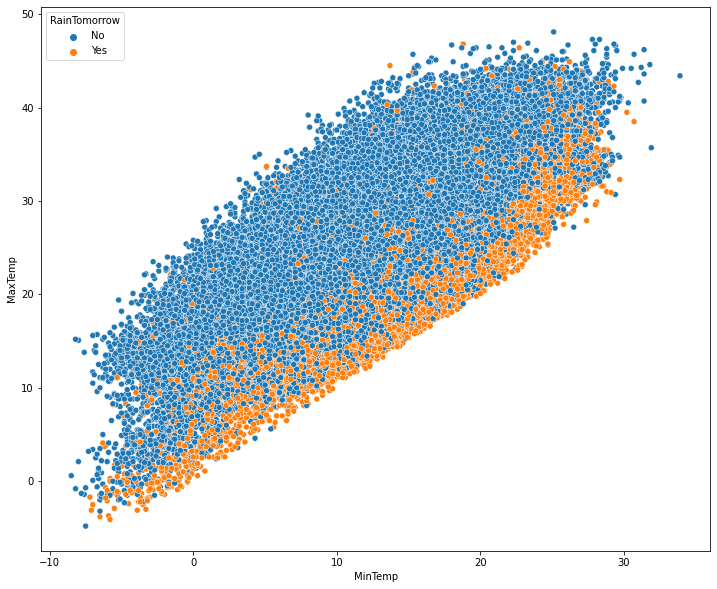

In [12]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=raw_df.MinTemp,y=raw_df.MaxTemp,hue=raw_df.RainTomorrow);

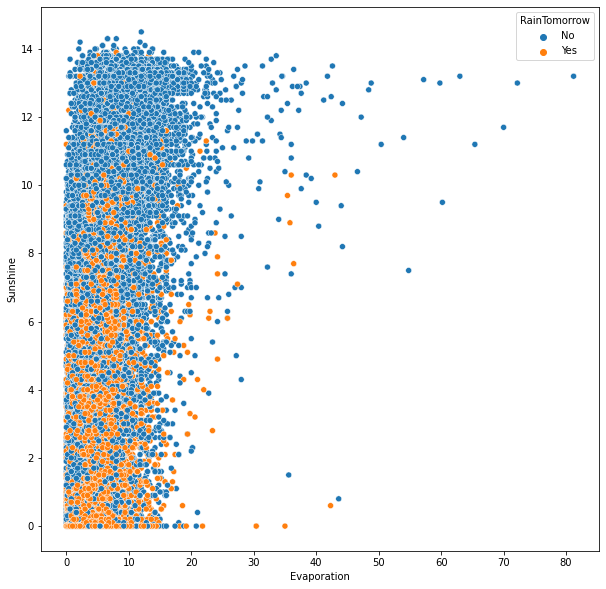

In [13]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=raw_df.Evaporation,y=raw_df.Sunshine,hue=raw_df.RainTomorrow);

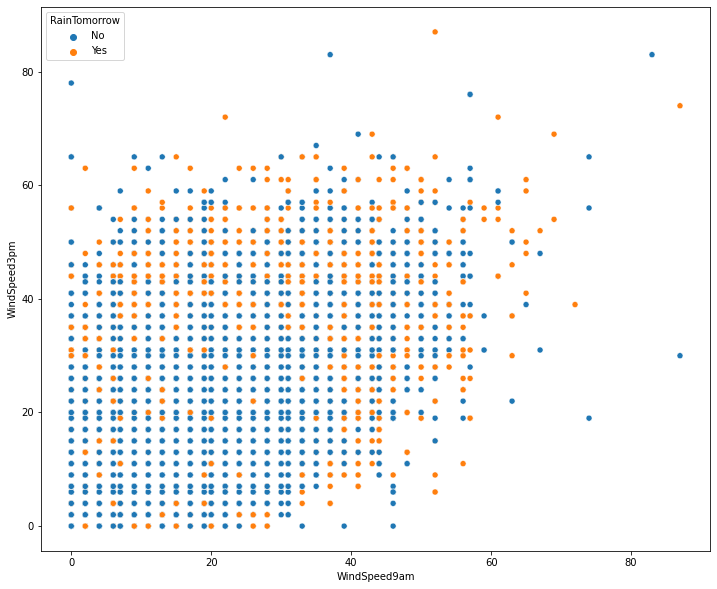

In [14]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=raw_df.WindSpeed9am,y=raw_df.WindSpeed3pm,hue=raw_df.RainTomorrow);

<AxesSubplot:xlabel='Humidity9am', ylabel='Humidity3pm'>

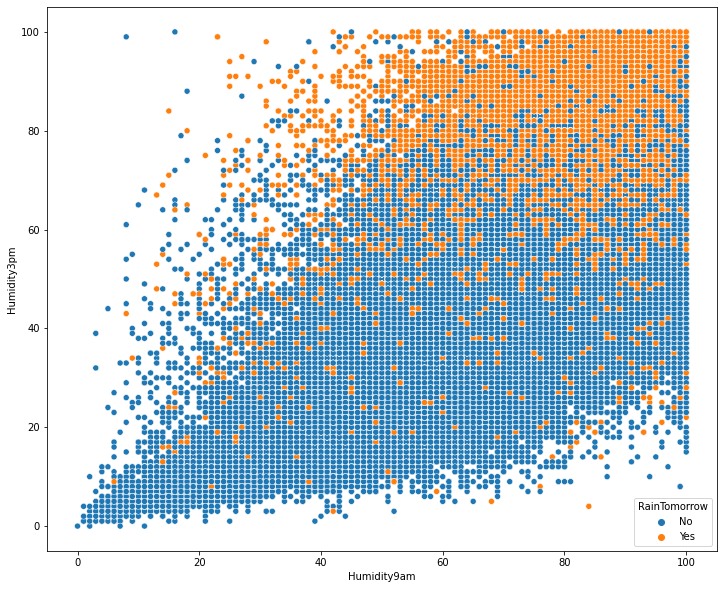

In [15]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=raw_df.Humidity9am,y=raw_df.Humidity3pm,hue=raw_df.RainTomorrow)

<AxesSubplot:xlabel='Pressure9am', ylabel='Pressure3pm'>

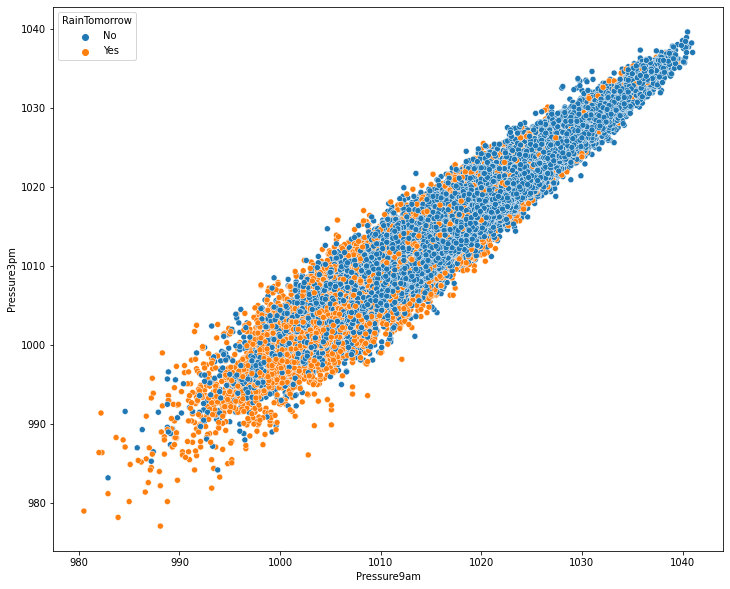

In [16]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=raw_df.Pressure9am ,y=raw_df.Pressure3pm ,hue=raw_df.RainTomorrow)

<AxesSubplot:xlabel='Temp9am', ylabel='Temp3pm'>

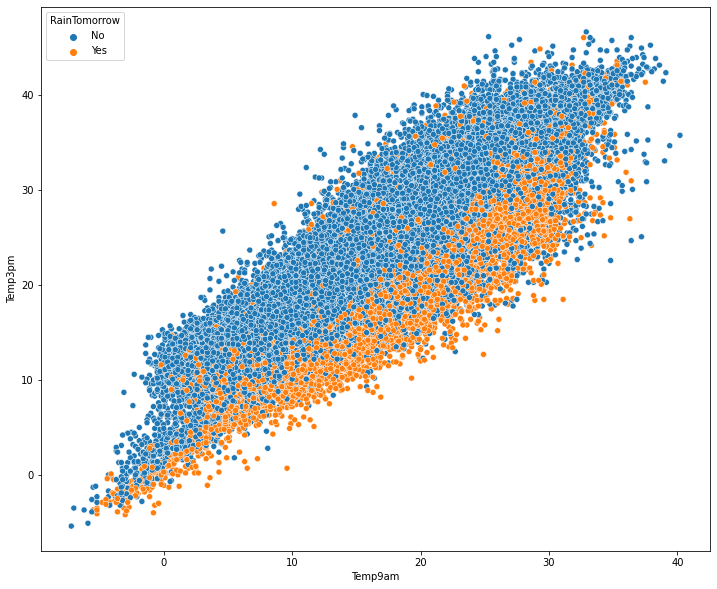

In [17]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=raw_df.Temp9am,y=raw_df.Temp3pm,hue=raw_df.RainTomorrow)

# Identifying inputs and targets

In [18]:
raw_df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [19]:
input_cols = raw_df.columns[0:-1]
input_cols

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM'],
      dtype='object')

In [20]:
target_col = raw_df.columns[-1]
target_col

'RainTomorrow'

# Splitting the data

In [21]:
raw_df.Date = pd.to_datetime(raw_df.Date)

In [22]:
raw_df['Year'] = raw_df.Date.dt.year

<AxesSubplot:xlabel='Year', ylabel='Count'>

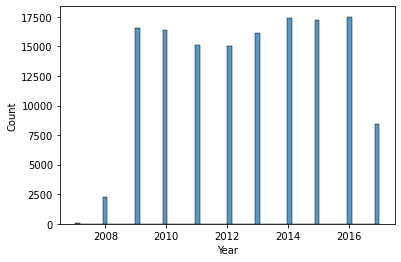

In [23]:
sns.histplot(raw_df.Year)

In [24]:
train_df = raw_df[raw_df.Year<=2015]

In [25]:
len(train_df)

116219

In [26]:
val_df = raw_df[raw_df.Year>2015]

In [27]:
len(val_df)

25974

In [28]:
X_train = train_df[input_cols].copy()
X_val = val_df[input_cols].copy()
y_train = train_df[target_col].copy()
y_val = val_df[target_col].copy()

# Data preprocessing

In [29]:
numeric_cols = raw_df[input_cols].select_dtypes('number').columns.tolist()
numeric_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RISK_MM']

In [30]:
categorical_cols = raw_df[input_cols].select_dtypes('object').columns.tolist()
categorical_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

# Imputation

In [31]:
X_train[numeric_cols].isna().sum()

MinTemp            477
MaxTemp            229
Rainfall          1142
Evaporation      45573
Sunshine         49861
WindGustSpeed     7810
WindSpeed9am      1215
WindSpeed3pm      1510
Humidity9am       1486
Humidity3pm       1854
Pressure9am      11334
Pressure3pm      11296
Cloud9am         42357
Cloud3pm         43785
Temp9am            814
Temp3pm           1141
RISK_MM              0
dtype: int64

In [32]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

In [33]:
imputer.fit(X_train[numeric_cols])
X_train[numeric_cols] = imputer.transform(X_train[numeric_cols])
X_val[numeric_cols] = imputer.transform(X_val[numeric_cols])
X_train[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RISK_MM          0
dtype: int64

In [34]:
X_val[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RISK_MM          0
dtype: int64

# Scaling

In [35]:
X_train[numeric_cols].describe().loc[['min','max']]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
min,-8.5,-4.1,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,980.5,979.0,0.0,0.0,-6.2,-5.1,0.0
max,33.9,48.1,371.0,82.4,14.5,135.0,87.0,87.0,100.0,100.0,1041.0,1039.6,9.0,9.0,40.2,46.1,371.0


In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train[numeric_cols])

MinMaxScaler()

In [37]:
X_train[numeric_cols] = scaler.transform(X_train[numeric_cols])
X_val[numeric_cols] = scaler.transform(X_val[numeric_cols])
X_train[numeric_cols].describe().loc[['min','max']]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [38]:
X_val[numeric_cols].describe().loc[['min','max']]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
min,0.016509,-0.013410,0.000000,0.000000,0.000000,0.007752,0.000000,0.000000,0.04,0.03,0.024793,-0.031353,0.000000,0.000000,-0.021552,-0.005859,0.000000
max,0.941038,0.984674,0.606469,1.759709,0.972414,0.883721,1.494253,0.747126,1.00,1.00,0.988430,0.948845,0.888889,0.888889,0.943966,1.011719,0.606469


In [44]:
X_train[categorical_cols] = X_train[categorical_cols].fillna('Unknown')

In [42]:
X_val[categorical_cols] = X_val[categorical_cols].fillna('Unknown')

# Encoding

In [45]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore',sparse=False)
encoder.fit(X_train[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [46]:
encoded_cols = encoder.get_feature_names(categorical_cols).tolist()
encoded_cols

['Location_Adelaide',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Penrith',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',
 'Location_Richmond',
 'Location_Sale',
 'Location_SalmonGums',
 'Location_Sydney',
 'Location_SydneyAirport',
 'Location_Townsville',
 'Location_Tuggeranong',
 'Location_Uluru',
 'Location_WaggaWagga',
 'Location_Walpole',
 'Locat

In [47]:
X_train[encoded_cols] = encoder.transform(X_train[categorical_cols])
X_val[encoded_cols] = encoder.transform(X_val[categorical_cols])

# Trainig DecisionTreeClassifier

In [48]:
X = X_train[numeric_cols+encoded_cols]

In [49]:
y = y_train

In [50]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=42)

In [51]:
dtree.fit(X,y)

DecisionTreeClassifier(random_state=42)

In [52]:
dtree.score(X,y)

1.0

In [53]:
dtree.score(X_val[numeric_cols+encoded_cols],y_val)

1.0

# Hyperparameter Tuning

In [54]:
from sklearn.model_selection import GridSearchCV
params_grid = {
    'max_depth':[10,20,30,40,50]
}
grid = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),cv=5,param_grid=params_grid)
grid.fit(X,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [10, 20, 30, 40, 50]})

In [55]:
grid.best_params_

{'max_depth': 10}

In [60]:
model = grid.best_estimator_

In [57]:
model = grid.best_estimator_
model.score(X,y)

1.0

In [58]:
model.score(X_val[numeric_cols+encoded_cols],y_val)

1.0

In [59]:
params_grid = {
    'max_leaf_nodes':[5,10,15,20,25]
}
grid = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),cv=5,param_grid=params_grid)
grid.fit(X,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [5, 10, 15, 20, 25]})

In [61]:
grid.best_params_


{'max_leaf_nodes': 5}

In [62]:
model = grid.best_estimator_
model.score(X,y)

1.0

In [63]:
params_grid = {
    'criterion':['gini','entropy'],
    'splitter':['best','random']
}
grid = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),cv=5,param_grid=params_grid)
grid.fit(X,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'splitter': ['best', 'random']})

In [64]:
grid.best_params_

{'criterion': 'gini', 'splitter': 'best'}

In [65]:
model_1 = DecisionTreeClassifier(random_state=42,criterion='gini',splitter='best',max_leaf_nodes=5,max_depth=10)
model_1.fit(X,y)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=5, random_state=42)

In [66]:
model_1.score(X,y)

1.0

In [67]:
model_1.score(X_val[numeric_cols+encoded_cols],y_val)

1.0

In [68]:
model_1.predict(X_val[numeric_cols+encoded_cols])

array(['No', 'Yes', 'Yes', ..., 'No', 'No', 'No'], dtype=object)

# Training RandomForestClassifier

In [69]:
rfc = RandomForestClassifier(random_state=42,n_jobs=-1)

In [70]:
rfc.fit(X,y)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [71]:
rfc.score(X,y)

1.0

In [72]:
rfc.score(X_val[numeric_cols+encoded_cols],y_val)

0.9998074998074998

In [73]:
model_2 = RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators=300,min_samples_split=15,criterion='entropy')
model_2.fit(X,y)

RandomForestClassifier(criterion='entropy', min_samples_split=15,
                       n_estimators=300, n_jobs=-1, random_state=42)

In [74]:
model_2.score(X,y)

1.0

In [75]:
model_2.score(X_val[numeric_cols+encoded_cols],y_val)

0.9998074998074998

In [76]:
model_2.predict(X_val[numeric_cols+encoded_cols])

array(['No', 'Yes', 'Yes', ..., 'No', 'No', 'No'], dtype=object)

# CONCLUSION : RandomForestClassifier has an accuracy of 99.9% and DecisionTreeClassifier has an accuracy of 100%.